# Statistics II. Homework 1

## Setup

In [2]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse

### Ex 1

In [33]:
N = 500 

In [40]:
mu = np.array([2, 3])
sig1, sig2, rho = 3, 2, 0.67
cov = np.array([
    [sig1 ** 2, rho * sig1 * sig2],
    [rho * sig1 * sig2, sig2 ** 2]
])

In [41]:
x, y = np.random.multivariate_normal(mu, cov, N).T

Для побудови довірчого еліпсу скористуємось тим, що у випадку двовимірного нормалізованого нормального розподілу, власні числа і відповідні власні вектори коваріаційної матриці легко знайти аналітично, а саме

$$\lambda_1 = 1 + \rho, \quad \vec{v_1} = [1,\  1]^T$$
$$\lambda_2 = 1 - \rho, \quad \vec{v_2} = [1,\ -1]^T$$

де $\rho$ -- коефіціент кореляції Пірсона (не діагональний елемент матирці коваріації).

Для не нормалізованого розподілу отриманий еліпс треба відмасштабувати на $\sigma_1$ і $\sigma_2$ вздовж $x$ та $y$ відповідно

In [42]:
def confidence_ellipse(x, y, ax, level=0.95, facecolor='none', **kwargs):
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * sci.stats.norm.ppf(level)
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * sci.stats.norm.ppf(level)
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ellipse

In [43]:
coefs = np.polyfit(x, y, 1)
regr_xy = np.poly1d(coefs)

coefs = np.polyfit(y, x, 1)
regr_yx = np.poly1d(coefs)

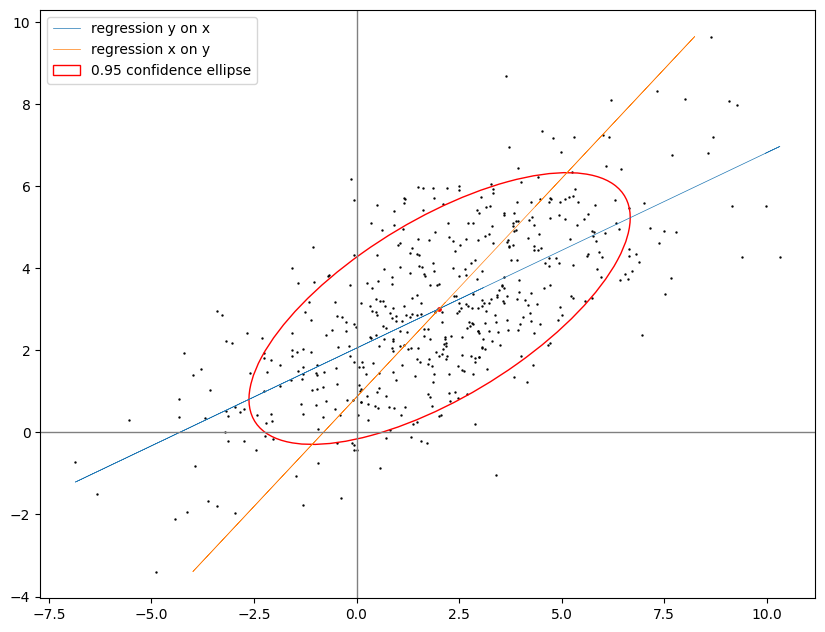

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, s=0.5, color='black')
ax.plot(x, regr_xy(x), lw=0.5, label='regression y on x')
ax.plot(regr_yx(y), y, lw=0.5, label='regression x on y')

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
ax.set_aspect("equal")

ax.add_patch(
    confidence_ellipse(x, y, ax, edgecolor='red', level=0.95, label='0.95 confidence ellipse')
)

ax.scatter(mu[0], mu[1], c='red', s=6)

ax.legend()

plt.show()

З побудови довірчого еліпсу зрозуміло, що $\sigma_1$ і $\sigma_2$ відповідають за масштабування еліпсу вздовж прямих $y=x$ і $y=-x$ відповідно. Кореляція ($\rho$) відповідає за відношення довжин осей еліпсу до масштабування (тобто при $\sigma_1 = \sigma_2$), а саме:

1. $\rho > 0 \Rightarrow \lambda_1 > \lambda_2 \Rightarrow$ еліпс більше видовжений по прямій $y=x$
1. $\rho = 0 \Rightarrow \lambda_1 = \lambda_2 \Rightarrow$ еліпс вироджується в коло 
1. $\rho < 0 \Rightarrow \lambda_1 < \lambda_2 \Rightarrow$ еліпс більше видовжений по прямій $y=-x$

І загалом більший модуль $\rho$ відповідає більшому розтягненню еліпса.

Продемонструємо це на прикладі

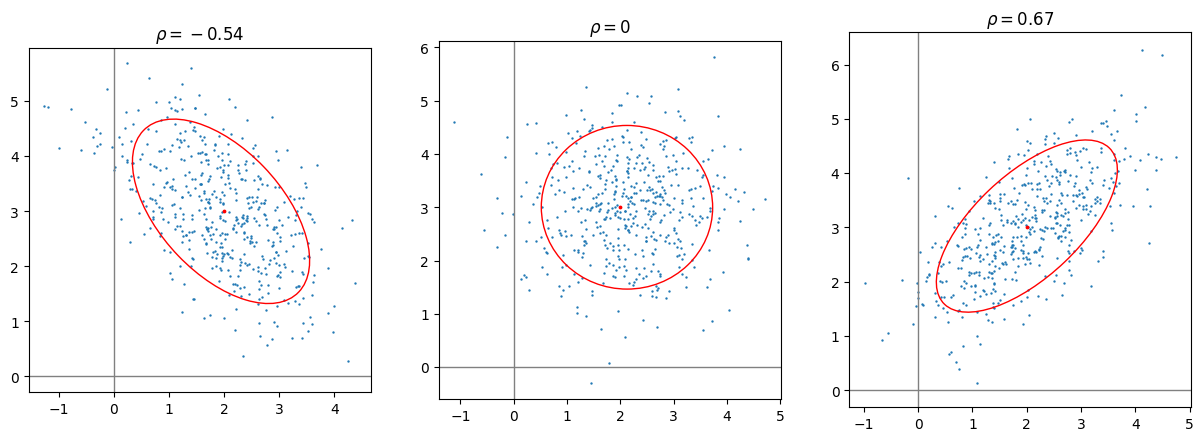

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

rhos = (-0.54, 0, 0.67)
sig1 = 1
sig2 = 1

for i in range(3):
    rho = rhos[i]
    cov = np.array([
        [sig1 ** 2, rho * sig1 * sig2],
        [rho * sig1 * sig2, sig2 ** 2]
    ])
    x, y = np.random.multivariate_normal(mu, cov, N).T

    ax = axs[i]
    ax.set_title(fr"$\rho = {rho}$")
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    ax.set_aspect("equal")

    ax.add_patch(
        confidence_ellipse(x, y, ax, edgecolor='red', level=0.95)
    )

    ax.scatter(mu[0], mu[1], c='red', s=3)

plt.show()

## Ex 2 (Rencher 5.18 a, b)

In [17]:
cols = ["group"] + [f"y{i+1}" for i in range(6)]
df = pd.read_table("data/T5_6_PILOT.DAT", header=None, sep="\s+", names=cols)

In [24]:
df1 = df[df.group == 1].drop(columns=['group'])
df2 = df[df.group == 2].drop(columns=['group'])

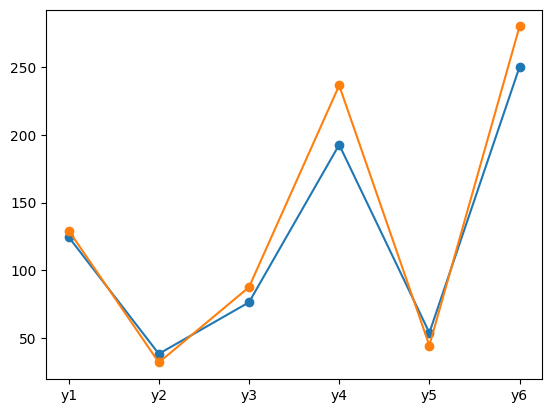

In [28]:
df1.mean().plot(marker='o')
df2.mean().plot(marker='o')
plt.show()

## Ex 3 (Rencher 5.20 a)